In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
titanic_df = pd.read_csv('spaceship-titanic_nonans.csv')

In [3]:
titanic_df = titanic_df.drop('Unnamed: 0', axis=1)

In [4]:
titanic_df.head()

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [5]:
titanic_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Deck            0
RoomNum         0
Side            0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [6]:
titanic_df.describe()

,RoomNum,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,600.367671,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,505.973797,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,173.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,448.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,983.000000,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,1894.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
correlation_matrix = titanic_df.corr()
correlation_matrix

,CryoSleep,RoomNum,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.037159,-0.069536,-0.074514,-0.241492,-0.204231,-0.207543,-0.196714,-0.190897,0.456062
RoomNum,-0.037159,1.000000,-0.129538,-0.095226,-0.008454,-0.180021,0.001697,-0.126451,-0.136526,-0.044578
Age,-0.069536,-0.129538,1.000000,0.089766,0.067612,0.127937,0.032655,0.120992,0.099210,-0.074249
VIP,-0.074514,-0.095226,0.089766,1.000000,0.054668,0.124234,0.017867,0.058806,0.120842,-0.034560
RoomService,-0.241492,-0.008454,0.067612,0.054668,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048
FoodCourt,-0.204231,-0.180021,0.127937,0.124234,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074
ShoppingMall,-0.207543,0.001697,0.032655,0.017867,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019
Spa,-0.196714,-0.126451,0.120992,0.058806,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791
VRDeck,-0.190897,-0.136526,0.099210,0.120842,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825
Transported,0.456062,-0.044578,-0.074249,-0.034560,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Deck          8693 non-null   object 
 3   RoomNum       8693 non-null   float64
 4   Side          8693 non-null   object 
 5   Destination   8693 non-null   object 
 6   Age           8693 non-null   float64
 7   VIP           8693 non-null   bool   
 8   RoomService   8693 non-null   float64
 9   FoodCourt     8693 non-null   float64
 10  ShoppingMall  8693 non-null   float64
 11  Spa           8693 non-null   float64
 12  VRDeck        8693 non-null   float64
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(7), object(4)
memory usage: 772.6+ KB


In [41]:
titanic_dummies = pd.get_dummies(titanic_df[['HomePlanet', 'Destination', 'VIP', 'CryoSleep', 'Side', 'Deck']])

In [42]:
titanic_dummies.head()

,VIP,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,False,False,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
1,False,False,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,True,False,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
3,False,False,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,False,False,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [43]:
# Concat dummy data
concat_df = pd.concat([titanic_df, titanic_dummies], axis=1)
concat_df.head()

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,...,0,1,0,0,0,0,0,1,0,0
2,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,...,0,1,1,0,0,0,0,0,0,0
3,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,...,0,1,1,0,0,0,0,0,0,0
4,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,...,0,1,0,0,0,0,0,1,0,0


In [44]:
concat_df = concat_df.select_dtypes(exclude=['object'])
concat_df

,CryoSleep,RoomNum,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,False,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,1,0,0,0,0,0,0
1,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,0,0,0,0,1,0,0
2,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,1,0,0,0,0,0,0,0
3,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,1,0,0,0,0,0,0,0
4,False,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,98.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,1,0,0,0,0,0,0,0
8689,True,1499.0,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
8690,False,1500.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,0,0,0,1,0
8691,False,608.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [45]:
concat_df.nunique()

CryoSleep                       2
RoomNum                      1818
Age                            81
VIP                             2
RoomService                  1274
FoodCourt                    1508
ShoppingMall                 1116
Spa                          1328
VRDeck                       1307
Transported                     2
VIP                             2
CryoSleep                       2
HomePlanet_Earth                2
HomePlanet_Europa               2
HomePlanet_Mars                 2
Destination_55 Cancri e         2
Destination_PSO J318.5-22       2
Destination_TRAPPIST-1e         2
Side_P                          2
Side_S                          2
Deck_A                          2
Deck_B                          2
Deck_C                          2
Deck_D                          2
Deck_E                          2
Deck_F                          2
Deck_G                          2
Deck_T                          2
dtype: int64

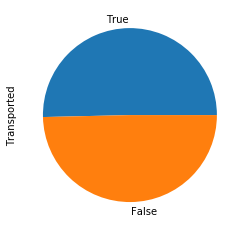

In [46]:
titanic_df['Transported'].value_counts().plot(kind='pie')

In [47]:
corr=titanic_df.corr()

In [48]:
corr

## Small amount of positive coorelation (.39) between being Transported and being in CryoSleep for the flight

,CryoSleep,RoomNum,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.037159,-0.069536,-0.074514,-0.241492,-0.204231,-0.207543,-0.196714,-0.190897,0.456062
RoomNum,-0.037159,1.000000,-0.129538,-0.095226,-0.008454,-0.180021,0.001697,-0.126451,-0.136526,-0.044578
Age,-0.069536,-0.129538,1.000000,0.089766,0.067612,0.127937,0.032655,0.120992,0.099210,-0.074249
VIP,-0.074514,-0.095226,0.089766,1.000000,0.054668,0.124234,0.017867,0.058806,0.120842,-0.034560
RoomService,-0.241492,-0.008454,0.067612,0.054668,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048
FoodCourt,-0.204231,-0.180021,0.127937,0.124234,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074
ShoppingMall,-0.207543,0.001697,0.032655,0.017867,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019
Spa,-0.196714,-0.126451,0.120992,0.058806,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791
VRDeck,-0.190897,-0.136526,0.099210,0.120842,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825
Transported,0.456062,-0.044578,-0.074249,-0.034560,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000


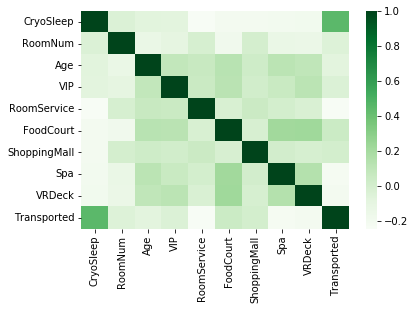

In [49]:
sns.heatmap(corr, cmap='Greens')

In [50]:
# Start Logistic Regression model

y = concat_df["Transported"]
X = concat_df.drop(columns="Transported")

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y)
X_train.shape

(6519, 27)

In [52]:
classifier = LogisticRegression(random_state=1)
classifier

LogisticRegression(random_state=1)

In [53]:
lr_model = classifier.fit(X_train, y_train)

/Users/ginaleonardi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [54]:
training_predictions = lr_model.predict(X_train)

testing_predictions = lr_model.predict(X_test)

In [55]:
 # Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[2496  740]
 [ 664 2619]]


In [56]:
 # Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[843 236]
 [236 859]]


In [57]:
 # Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

       False       0.79      0.77      0.78      3236
        True       0.78      0.80      0.79      3283

    accuracy                           0.78      6519
   macro avg       0.78      0.78      0.78      6519
weighted avg       0.78      0.78      0.78      6519



In [58]:
 # Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

       False       0.78      0.78      0.78      1079
        True       0.78      0.78      0.78      1095

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174

